In [32]:
import pandas as pd
import os, matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

sample_clean_file = os.getcwd() + "/sample_orig_combined.csv"
sample_df = pd.read_csv(sample_clean_file,low_memory=False)
sample_df.head(2)

,credit_score,first_payment_date,fthb_flag,matr_date,msa,mortage_insurance_pct,no_of_units,occupancy_status,cltv,dti_ratio,...,property_state,prop_type,zipcode,loan_seq_number,loan_purpose,original_loan_term,number_of_borrowers,sellers_name,servicer_name,super_conforming_flag
0,591.0,200504,N,203503,39100.0,0.0,1,O,48.0,34.0,...,NY,SF,12500.0,F105Q1000087,C,360,2.0,Other sellers,Other servicers,N
1,792.0,200503,N,203502,39100.0,0.0,1,O,90.0,33.0,...,NY,SF,12500.0,F105Q1000130,P,360,2.0,Other sellers,Other servicers,N


In [33]:
performance_file = os.getcwd() + "/Summarized_performance_data.csv" 
perf_df = pd.read_csv(performance_file, low_memory=False)
perf_df.head(2)

,loan_seq_number,month,max_current_actual_upb,min_current_actual_upb,delq_status,loan_age,rem_months,repurchase_flag,modification_flag,zero_balance_code,...,mi_recoveries,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins,misc_expenses,actual_loss_calc,modification_cost
0,F105Q1000064,200912,62000.0,0.0,0,57,303,NaN,Not Modified,1,...,0.0,U,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,F105Q1000076,201011,197000.0,0.0,0,69,291,NaN,Not Modified,1,...,0.0,U,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [34]:
perf_df['Year'] = ['20'+ x for x in (perf_df['loan_seq_number'].apply(lambda x: x[2:4]))]

In [35]:
perf_df['Year'].unique()

array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016'], dtype=object)

In [36]:
merged_df = pd.merge(sample_df,perf_df,on="loan_seq_number",how="right")

In [37]:
merged_df.head(2)

,credit_score,first_payment_date,fthb_flag,matr_date,msa,mortage_insurance_pct,no_of_units,occupancy_status,cltv,dti_ratio,...,net_sale_proceeds,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins,misc_expenses,actual_loss_calc,modification_cost,Year
0,591.0,200504.0,N,203503.0,39100.0,0.0,1.0,O,48.0,34.0,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005
1,792.0,200503.0,N,203502.0,39100.0,0.0,1.0,O,90.0,33.0,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005


In [38]:
merged_df.shape

(574957, 50)

In [39]:
yearwise_df = pd.DataFrame()
grouped = merged_df.groupby('Year')
yearwise_df = yearwise_df.append(grouped.aggregate(np.mean))
yearwise_df.drop(['first_payment_date', 'matr_date', 'msa','zipcode', 'ddlpi','month', 'zero_bal_date', 'rem_months'], axis=1, inplace=True)
#yearwise_df = yearwise_df.transpose()
yearwise_df.head(2)

,credit_score,mortage_insurance_pct,no_of_units,cltv,dti_ratio,original_upb,original_ltv,original_int_rt,original_loan_term,number_of_borrowers,...,current_def_upb,mi_recoveries,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_ins,misc_expenses,actual_loss_calc,modification_cost
Year,,,,,,,,,,,,,,,,,,,,,
2005,724.727288,3.027869,1.022480,70.694997,34.262401,177046.460124,68.955302,5.796721,324.040912,1.574143,...,280.138023,464.618472,-0.084262,-843.454029,-181.551291,0.0,-351.148563,2.520510,4.808156,623.028921
2006,723.229643,3.226935,1.024275,72.977019,35.954134,186530.265996,70.394848,6.397613,337.934244,1.545243,...,630.526992,744.321519,-0.238434,-1255.048423,-270.701882,0.0,-536.433386,5.080985,4.846371,1255.534917


###### Variables trends over the time

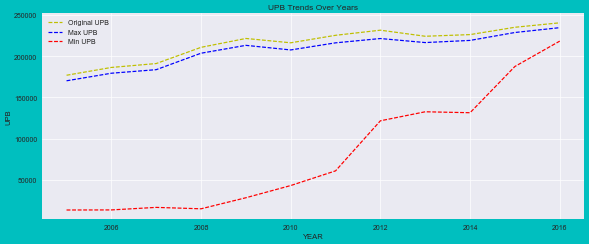

In [51]:
def upb_trends_over_time():
    original_upb = yearwise_df['original_upb']
    max_current_actual_upb = yearwise_df['max_current_actual_upb']
    min_current_actual_upb = yearwise_df['min_current_actual_upb']
    year = perf_df['Year'].drop_duplicates()
    #year_df = pd.DataFrame(perf_df['Year'].drop_duplicates()).reset_index()
    #year_df.columns = ['Count', 'Year']
    #year_df = year_df.ix[(year_df['Year'] == '2007') | (year_df['Year'] == '2008') | (year_df['Year'] == '2009')]
    plt.figure(num=None, figsize=(14, 12),dpi=50, facecolor='c', edgecolor='b')
    ax1=plt.subplot(211)
    plt.plot(year,original_upb,'y--',year,max_current_actual_upb,'b--',year,min_current_actual_upb,'r--')
    plt.xlabel('YEAR')
    plt.ylabel('UPB')
    plt.legend(['Original UPB','Max UPB','Min UPB'])
    plt.grid(True)
    plt.title('UPB Trends Over Years')
    
upb_trends_over_time()

###### Zero Balance Code Trends over Time

In [52]:
total_records = merged_df.shape[0]
print("Total records is {}".format(total_records))

Total records is 574957


In [53]:
total_default_records = merged_df.ix[(merged_df['zero_balance_code'] == 3) | (merged_df['zero_balance_code'] == 6) |
                              (merged_df['zero_balance_code'] == 9)]
count = total_default_records.shape[0]
print("Total number of default record is: {}".format(count))
default_ratio = str(round(count/total_records,2))
print("Total default ratio is {}".format(default_ratio))

Total number of default record is: 15042
Total default ratio is 0.03


In [54]:
total_prepaid_records = merged_df.ix[merged_df['zero_balance_code'] == 1]
count_prepaid = total_prepaid_records.shape[0]
print("Total number of prepaid record is {}".format(count_prepaid))
prepaid_ratio = str(round(count_prepaid/total_records,2))
print("Total prepaid ratio is {}".format(prepaid_ratio))

Total number of prepaid record is 314001
Total prepaid ratio is 0.55


In [55]:
total_default_records_by_year = total_default_records.groupby(perf_df['Year'])['loan_seq_number'].count()
total_default_records_by_year

Year
2005    3131
2006    4432
2007    4014
2008     826
2009     193
2010      90
2011      36
2012      75
2013      41
2014     172
2015    1960
2016      72
Name: loan_seq_number, dtype: int64

In [56]:
total_records_by_year = merged_df.groupby(perf_df['Year'])['loan_seq_number'].count()
total_records_by_year

Year
2005    49999
2006    49997
2007    49996
2008    49994
2009    49999
2010    49998
2011    49997
2012    49997
2013    50000
2014    50000
2015    49999
2016    24981
Name: loan_seq_number, dtype: int64

In [57]:
total_default_records_by_year.name = "Default Records Number"
total_records_by_year.name = "Total Records"

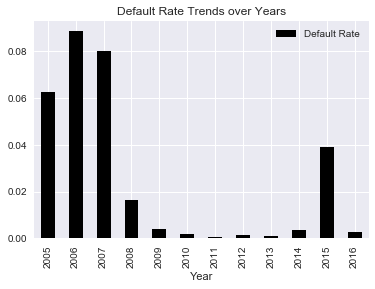

In [58]:
default_rate_by_year = pd.concat([total_default_records_by_year,total_records_by_year],axis = 1, join='outer')
default_rate_by_year['Default Rate'] = default_rate_by_year['Default Records Number']/default_rate_by_year['Total Records']
default_rate_by_year.plot(title ="Default Rate Trends over Years",y='Default Rate', color='k', kind='bar')


In [59]:
total_prepaid_records_by_year = total_prepaid_records.groupby(perf_df['Year'])['loan_seq_number'].count()
total_prepaid_records_by_year

Year
2005    40576
2006    39853
2007    40065
2008    40911
2009    35118
2010    29129
2011    14428
2012    16237
2013    10599
2014     6390
2015    35944
2016     4751
Name: loan_seq_number, dtype: int64

In [60]:
total_prepaid_records_by_year.name = "Prepaid Records Number"
total_records_by_year.name = "Total Records"

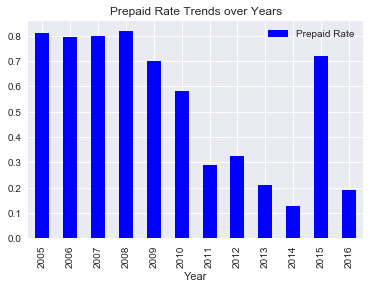

In [61]:
prepaid_rate_by_year = pd.concat([total_prepaid_records_by_year,total_records_by_year],axis = 1, join='outer')
prepaid_rate_by_year['Prepaid Rate'] = prepaid_rate_by_year['Prepaid Records Number']/prepaid_rate_by_year['Total Records']
prepaid_rate_by_year.plot(title ="Prepaid Rate Trends over Years",y='Prepaid Rate', color='b', kind='bar')


###### Statewise Trends

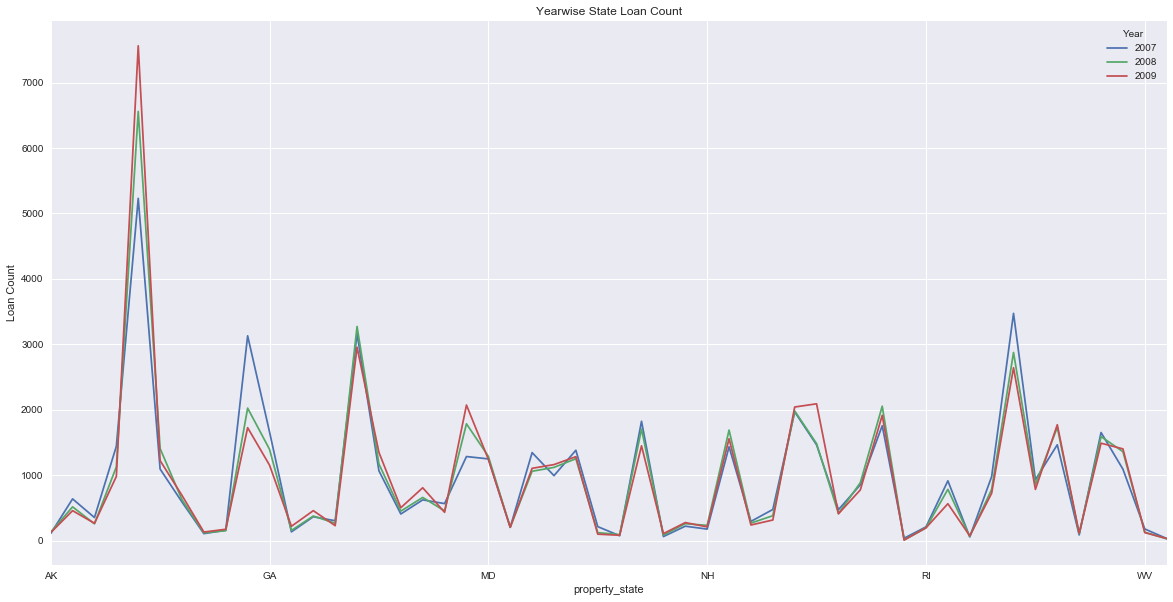

In [62]:
state_loan = pd.DataFrame()
state_loan = merged_df.groupby(['property_state', perf_df['Year']]).size()
loan_count = state_loan.unstack()
loan_count[["2007","2008" ,"2009"]].plot(figsize=(20,10))
plt.title('Yearwise State Loan Count')
plt.ylabel('Loan Count');

###### Zero Balance Code Trends

In [63]:
def get_zero_bal_code(df, x):
    if (df.ix[x,'zero_balance_code'] == 0) or (df.ix[x,'zero_balance_code'] == 1):
        return 'Prepaid'
    elif (df.ix[x,'zero_balance_code'] == 3):
        return "Foreclosure Alternative Group"
    elif (df.ix[x,'zero_balance_code'] == 6):
        return "Repurchse"
    elif (df.ix[x,'zero_balance_code'] == 9):
        return "REO Disposition"
    else:
        return 'NA'

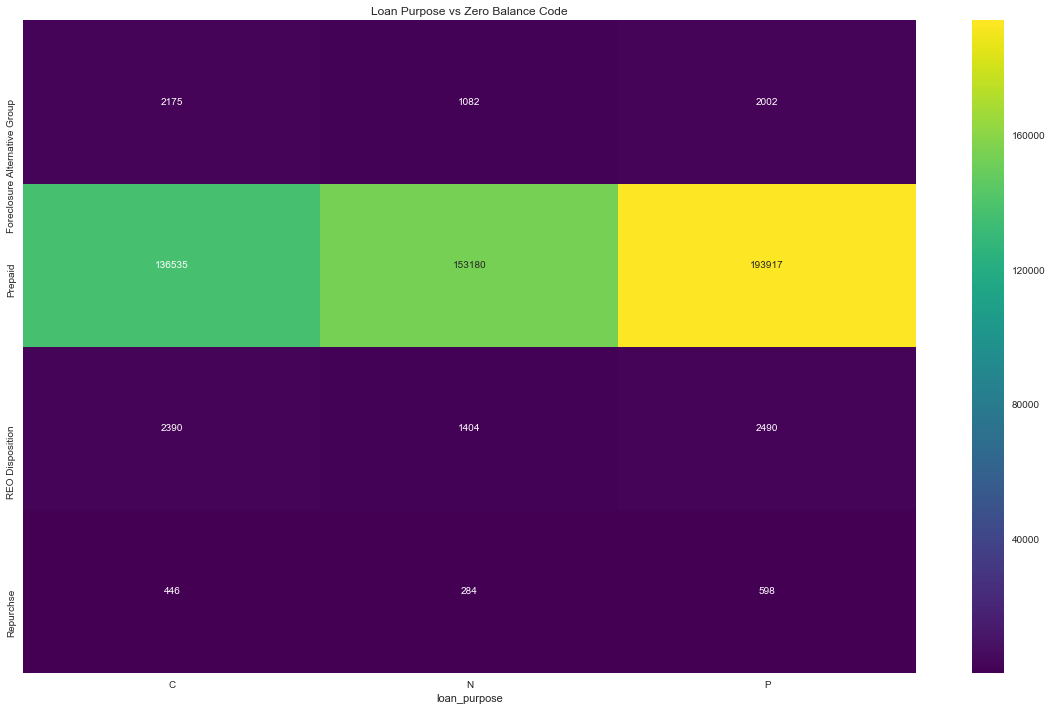

In [64]:
loan_purpose_status = merged_df.groupby([lambda x: get_zero_bal_code(merged_df, x), 'loan_purpose'])['loan_seq_number'].count()
loan_purpose_status = loan_purpose_status.unstack(level=0)
plt.figure(figsize=(20, 12))
plt.title('Loan Purpose vs Zero Balance Code')
ax =sns.heatmap(loan_purpose_status.T, mask= loan_purpose_status.T.isnull(),annot=True, fmt='d',cmap='viridis');


###### Debt-to-income trends over years

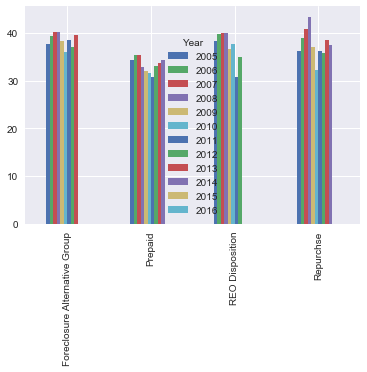

In [65]:
dti_trends = merged_df.groupby([lambda x: get_zero_bal_code(merged_df, x),perf_df['Year']])['dti_ratio'].mean()
dti_trends.unstack().plot(kind='bar')

###### Sellers and Servicer Ranking Analysis

In [68]:
def plot_ranking_graph(df):
    plt.figure() 
    df.head(n=30).plot(figsize=(18,4), kind='bar')
    plt.axhline(merged_df.original_upb.mean(), color='k')

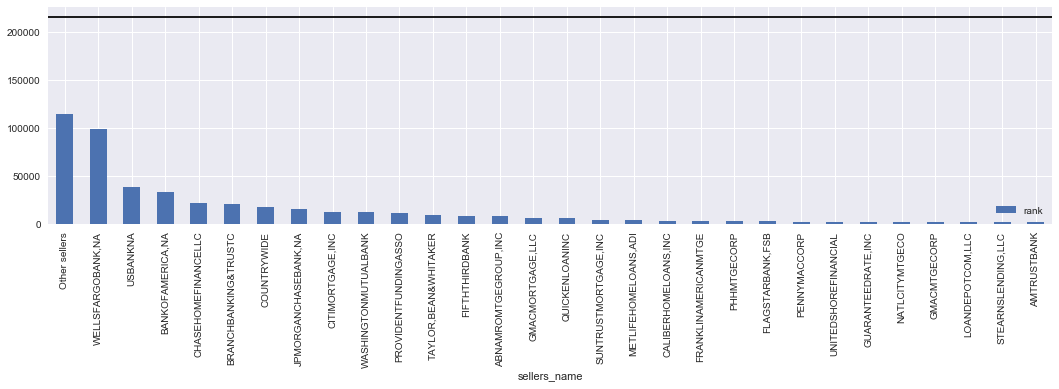

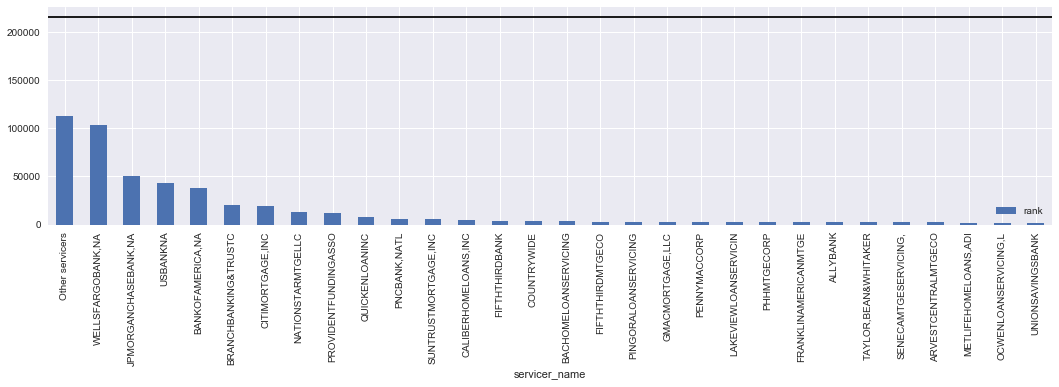

In [67]:
#sellers ranking
sellers_rank = pd.DataFrame()
sellers_rank['rank'] = merged_df['loan_seq_number'].groupby(merged_df['sellers_name']).count().sort_values(ascending = False)
plot_ranking_graph(sellers_rank)

#servicer ranking
servicer_rank = pd.DataFrame()
servicer_rank['rank'] = merged_df['loan_seq_number'].groupby(merged_df['servicer_name']).count().sort_values(ascending = False)
plot_ranking_graph(servicer_rank)

###### Credit Score Analysis

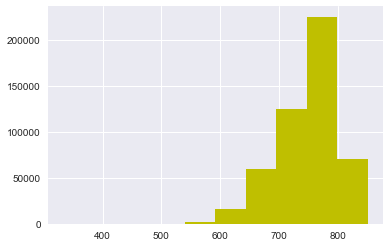

In [69]:
merged_df['credit_score'].hist(color='y')

###### Interest rate trends over time

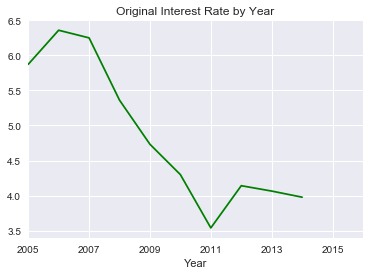

In [70]:
rate_by_year = merged_df.groupby(perf_df['Year'])['original_int_rt'].mean()
rate_by_year.plot(title="Original Interest Rate by Year", color='g')

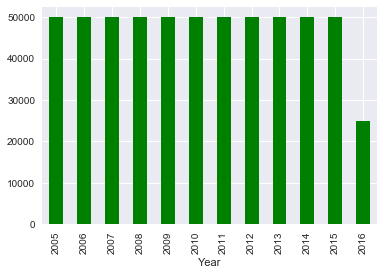

In [71]:
total_applications_by_year = merged_df.groupby(perf_df['Year'])['loan_seq_number'].count()
total_applications_by_year.plot(kind='bar', color='g')